# Analysis and Visualization of Complex Agro-Environmental Data
---
## Bivariate analysis and visualization

In [1]:
import pandas as pd
import zipfile
import seaborn as sns # For plotting
import matplotlib.pyplot as plt # For showing plots

In [29]:
df = pd.read_csv('../../examples/EFIplus_medit.zip',compression='zip', sep=";")

In [3]:
df

,Site_code,Latitude,Longitude,Country,Catchment_name,Galiza,Subsample,Calib_EFI_Medit,Calib_connect,Calib_hydrol,...,Squalius malacitanus,Squalius pyrenaicus,Squalius torgalensis,Thymallus thymallus,Tinca tinca,Zingel asper,Squalius sp,Barbatula sp,Phoxinus sp,Iberochondrostoma_sp
0,ES_01_0002,38.102003,-4.096070,Spain,Guadalquivir,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,ES_02_0001,40.530188,-1.887796,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,ES_02_0002,40.595432,-1.928079,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,ES_02_0003,40.656184,-1.989831,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,ES_02_0004,40.676402,-2.036274,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5006,PTVO60,40.641612,-8.325149,Portugal,Vouga,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5007,PTVO61,40.729015,-8.098851,Portugal,Vouga,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5008,PTVO62,40.727959,-8.107344,Portugal,Vouga,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5009,PTVO63,40.817783,-8.224903,Portugal,Vouga,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# clean up the dataset to remove unnecessary columns (eg. REG) 
df.drop(df.iloc[:,5:15], axis=1, inplace=True)

# let's rename some columns so that they make sense
df.rename(columns={'Sum of Run1_number_all':'Total_fish_individuals'}, inplace=True) # inplace="True" means that df will be updated

# for sake of consistency, let's also make all column labels of type string
df.columns = list(map(str, df.columns))

In [5]:
# Check data types
pd.options.display.max_rows = 154 # maximum number of rows displayed.
df.dtypes

Site_code                                object
Latitude                                float64
Longitude                               float64
Country                                  object
Catchment_name                           object
Water_source_type                        object
Flow_regime                              object
Altitude                                  int64
Geological_typology                      object
Actual_river_slope                      float64
Natural_sediment                        float64
Elevation_mean_catch                    float64
prec_ann_catch                          float64
temp_ann                                float64
temp_jan                                float64
temp_jul                                float64
Barriers_catchment_down                   int64
Barriers_river_segment_up               float64
Barriers_river_segment_down             float64
Barriers_number_river_segment_up        float64
Barriers_number_river_segment_down      

### Visualizing pairs of `categorical` variables

#### Crosstabulate categorical data

In [6]:
ctab = pd.crosstab(df['Eutrophication'], df['Salmo trutta fario'])
print(ctab)

Salmo trutta fario    0     1
Eutrophication               
1.0                 691  2313
3.0                 713   484
4.0                 433   149
5.0                  78    16


#### Barplot

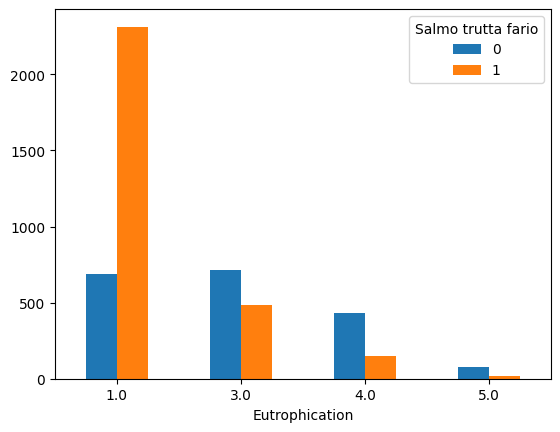

In [7]:

# Creating barplot from crosstable
barplot = ctab.plot.bar(rot=0)

### visualizing `categorical` *versus* `continuous` variables

#### Barplots

`Barplots` are typically used to visualize quantitative variables against categorical variables. This visualization is preferred when there is a limited number of categories and are used when the focus is on comparing quantities. If each category has a correspondent sample of observations, then barplots must show error bars to express data variability.

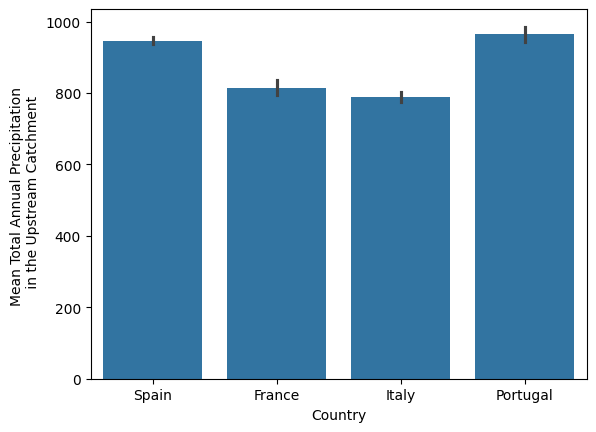

In [8]:
sns.barplot(data=df, x="Country", y="prec_ann_catch")
plt.ylabel( "Mean Total Annual Precipitation \n in the Upstream Catchment" , size = 10) 
plt.show()

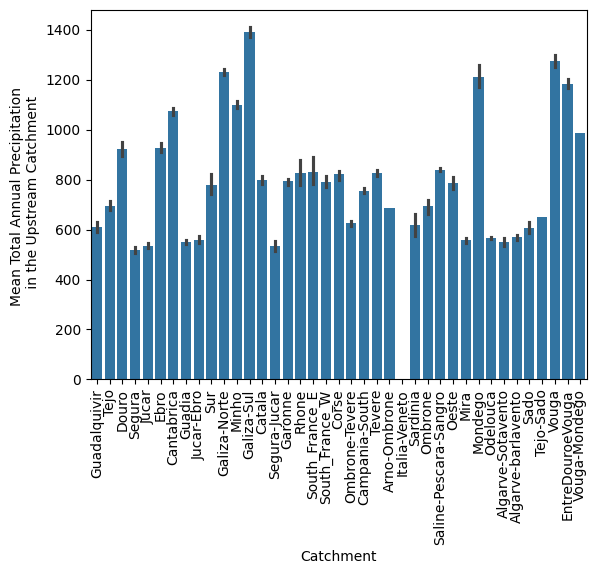

In [9]:
sns.barplot(data=df, x="Catchment_name", y="prec_ann_catch")
plt.xlabel( "Catchment" , size = 10) 
plt.ylabel( "Mean Total Annual Precipitation \n in the Upstream Catchment" , size = 10) 
plt.xticks(rotation=90)
plt.show()

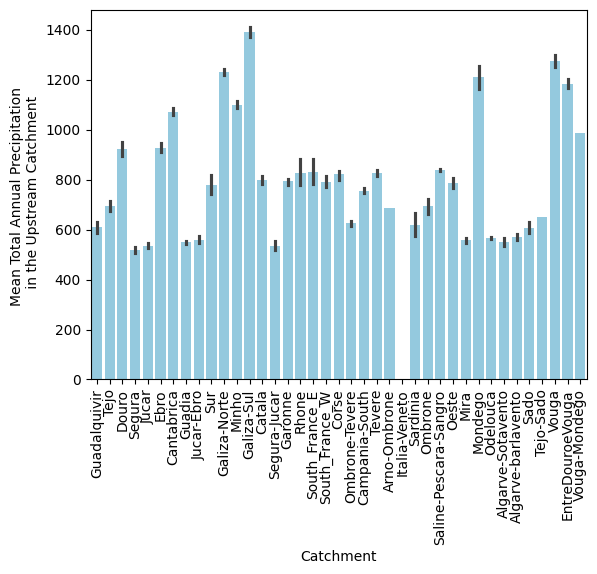

In [10]:
sns.barplot(data=df, x="Catchment_name", y="prec_ann_catch", color="skyblue")
plt.xlabel( "Catchment" , size = 10) 
plt.ylabel( "Mean Total Annual Precipitation \n in the Upstream Catchment" , size = 10) 
plt.xticks(rotation=90)
plt.show()

#### Boxplots

`Boxplots` are also often use to visualize quantitative variables against categorical variables but now the focus is on analysing overlap among samples' distributions.

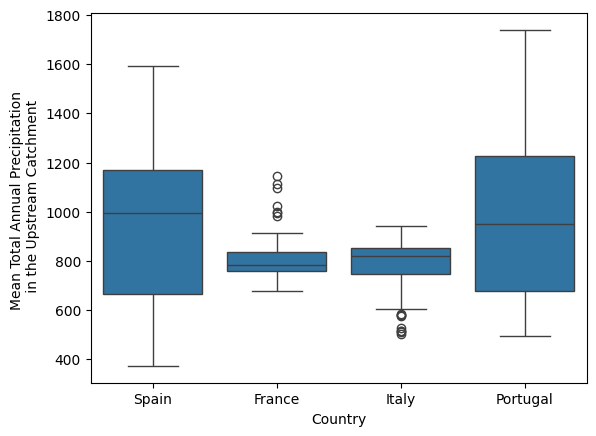

In [11]:
sns.boxplot(x="Country", y="prec_ann_catch", data=df)
plt.ylabel( "Mean Total Annual Precipitation \n in the Upstream Catchment" , size = 10) 
plt.show()

#### violin plots

`violin plots` are increasingly used over boxplot to analyse overlap among samples. The probability distribution allows more detail on analysing overlap among samples.  

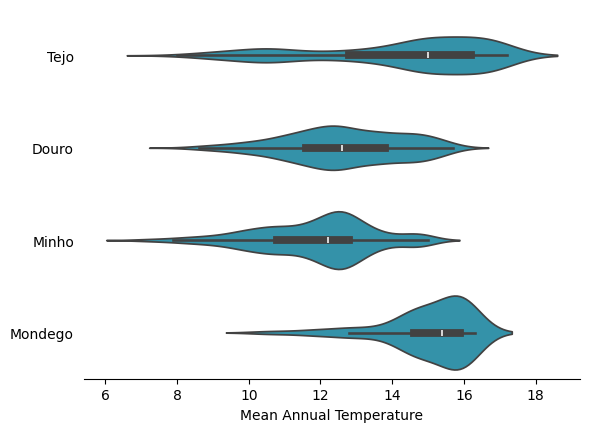

In [12]:
dfsub = df[(df['Catchment_name']=='Mondego') | 
    (df['Catchment_name']=='Douro') |
    (df['Catchment_name']=='Minho') |
    (df['Catchment_name']=='Tejo')
    ]
sns.violinplot(
    data= dfsub,
    x='temp_ann',
    y='Catchment_name',
    color='#219ebc', # HEX color picked from here: https://coolors.co/palettes/trending - don't forget to start by "#"
    )
plt.tick_params(left=False) # removes tickmarks
sns.despine(left=True)
plt.xlabel('Mean Annual Temperature')
plt.ylabel('')
plt.show()

#### Stripplots

`Stripplots` are used with the same end as boxplots and violin plots. A `jitter` function is used to randomly display data points along an axis that is perpendicular to the continuous variable axis, which forms a strip of variable width where obervations are plotted. 

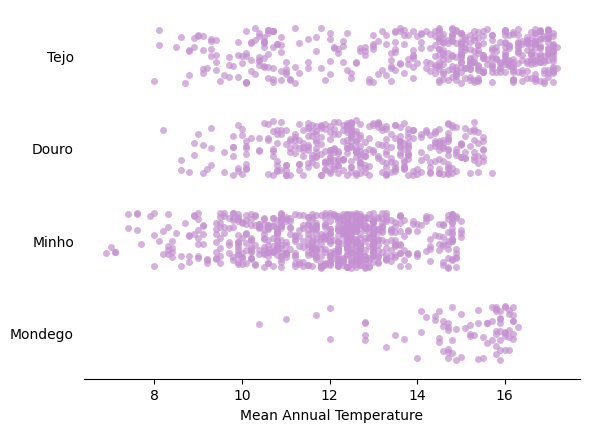

In [13]:
dfsub = df[(df['Catchment_name']=='Mondego') | 
    (df['Catchment_name']=='Douro') |
    (df['Catchment_name']=='Minho') |
    (df['Catchment_name']=='Tejo')
    ]

sns.stripplot(
    data= dfsub,
    x='temp_ann',
    y='Catchment_name',
    jitter=0.3, # the ammount of jitter (i.e. random point dispersion along the x-axis).
    linewidth=0, # no line around the points
    color='#c490d1', # HEX color picked from here: https://coolors.co/palettes/trending - don't forget to start by "#"
    alpha=.7,
    s=5 # point size
    )
plt.tick_params(left=False) # removes bottom tickmarks
sns.despine(left=True)
plt.xlabel('Mean Annual Temperature')
plt.ylabel('')
plt.show()

#### Mixed visualizations

It is becoming frequent to mix visualizations such as boxplots, violin plots and strip plots in the same plot, offering complementary information about the data.

##### Box plots with jitter

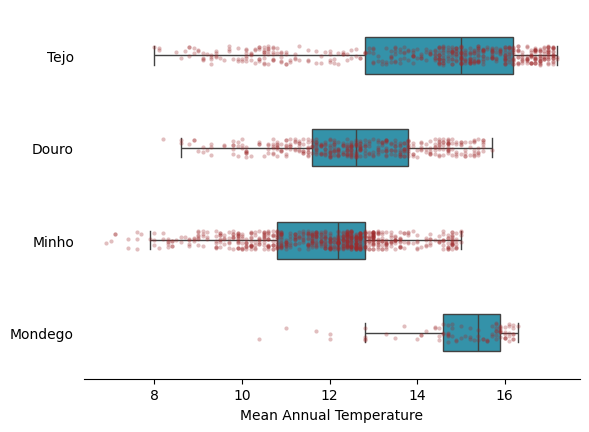

In [14]:

dfsub = df[(df['Catchment_name']=='Mondego') | 
    (df['Catchment_name']=='Douro') |
    (df['Catchment_name']=='Minho') |
    (df['Catchment_name']=='Tejo')
    ]
sns.boxplot(
    data= dfsub,
    x='temp_ann',
    y='Catchment_name',
    width=0.4,
    fliersize=0,
    color='#219ebc', # HEX color picked from here: https://coolors.co/palettes/trending - don't forget to start by "#"
    )
sns.stripplot(
    data= dfsub,
    x='temp_ann',
    y='Catchment_name',
    jitter=0.1, # the ammount of jitter (i.e. random point dispersion along the x-axis).
    linewidth=0, # no line around the poits
    color='#9e2a2b', # HEX color picked from here: https://coolors.co/palettes/trending - don't forget to start by "#"
    alpha=.3,
    s=3, # point size
    )
plt.tick_params(left=False) # removes tickmarks
sns.despine(left=True)
plt.xlabel('Mean Annual Temperature')
plt.ylabel('')
plt.show()

##### Raincloud plots

In [ ]:
import ptitprince as pt

pt.RainCloud(x='Country', y="prec_ann_catch", data=df, 
             bw=0.2, # defines how smooth is the distribution curve of the violin plot (cloud)
             width_viol=1.2, # width of the half violin (cloud)
             width_box=0.15, # wdth of the box
             orient='h', # orientation
             move=0.15, #position of the strip plot
             offset=0,# relative position of the half violin (cloud) in relation to the boxplot
             jitter=0.09) # allows to define the width of the strip plot (rain)

plt.title("Raincloud plot of Total Annual Precipitation")
plt.xlabel( "Mean Total Annual Precipitation in the Upstream Catchment" , size = 10)
plt.ylabel("")
plt.show()

### visualizing pairs of `continuous` variables

#### Line plot

Line plots are typically used to plot a variable against time.

But it can make some sense in other situations, such as in the following example:

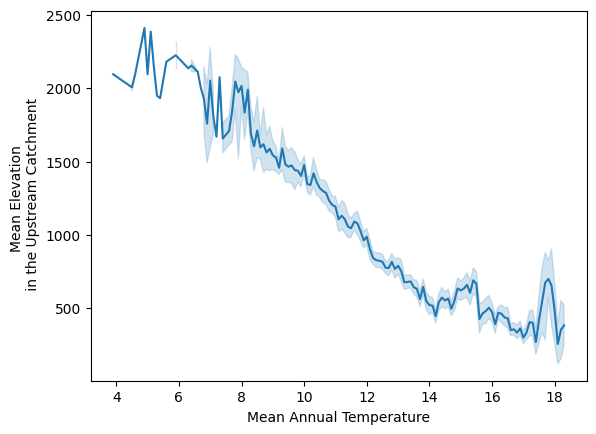

In [15]:
sns.lineplot(data=df, x='temp_ann', y='Elevation_mean_catch')
plt.xlabel( "Mean Annual Temperature" , size = 10) 
plt.ylabel( "Mean Elevation \n in the Upstream Catchment" , size = 10) 
plt.show()

#### Scatter plots

`scatter plots` are a useful method of comparing continuous variables against each other. They often are used to map independent and dependent variables on a 2D graph. The data in a scatter plot is considered to express a trend. With further analysis using tools like regression, we can mathematically calculate this relationship and use it to predict trends outside the dataset.

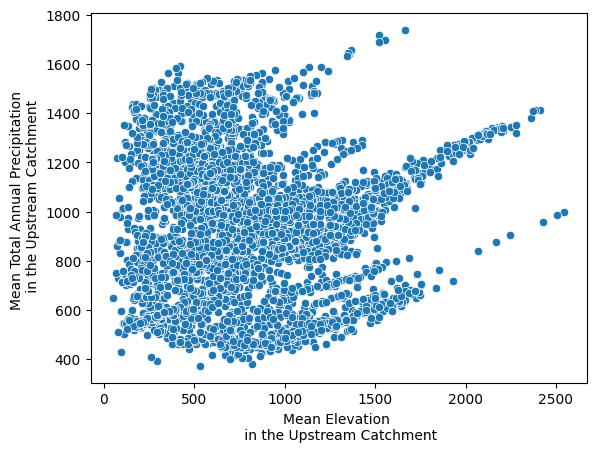

In [16]:
sns.scatterplot(data=df, x='Elevation_mean_catch', y='prec_ann_catch')
plt.xlabel( "Mean Elevation \n in the Upstream Catchment" , size = 10) 
plt.ylabel( "Mean Total Annual Precipitation \n in the Upstream Catchment" , size = 10) 
plt.show()

#### Joint plots

A Jointplot is a figure that showcases the relationship between two variables, combining scatter plots, hexbin plots, regression plots, or 2D kernel density plots with histograms, KDE (Kernel Density Estimate) plots, or other representations of the univariate distribution of each variable on the margins.

Run codes bellow for some examples using Mean Total Annual Precipitation against Mean Elevation:

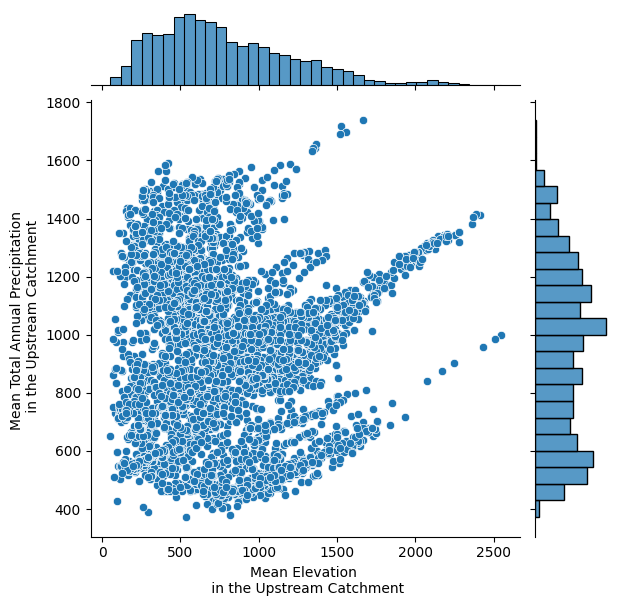

In [17]:
# Scatter plot with histograms

g = sns.jointplot(data=df, x='Elevation_mean_catch', y='prec_ann_catch')
g.ax_joint.set_xlabel('Mean Elevation \n in the Upstream Catchment') # NOTE: it's not possible to use plt.xlabel to change axis titles in the case of jointplots
g.ax_joint.set_ylabel('Mean Total Annual Precipitation \n in the Upstream Catchment')
plt.show()

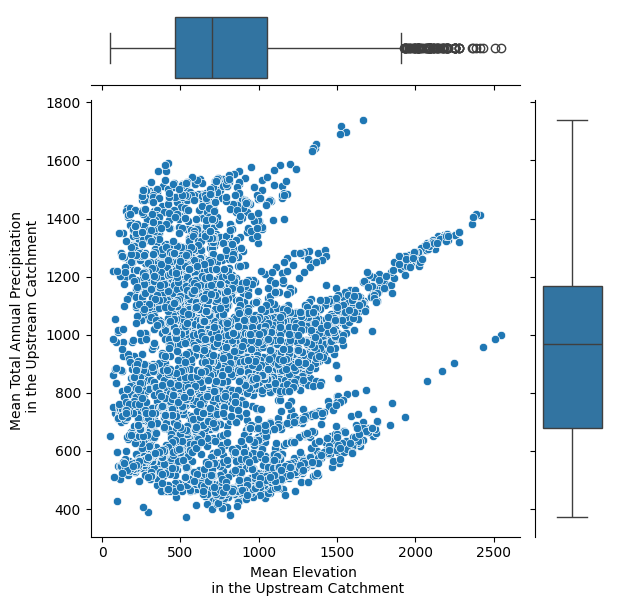

In [18]:
# Scatter plot with boxplots

g = sns.JointGrid(data=df, x='Elevation_mean_catch', y='prec_ann_catch')
g.plot(sns.scatterplot, sns.boxplot)
g.ax_joint.set_xlabel('Mean Elevation \n in the Upstream Catchment') # NOTE: it's not possible to use plt.xlabel to change axis titles
g.ax_joint.set_ylabel('Mean Total Annual Precipitation \n in the Upstream Catchment')
plt.show()

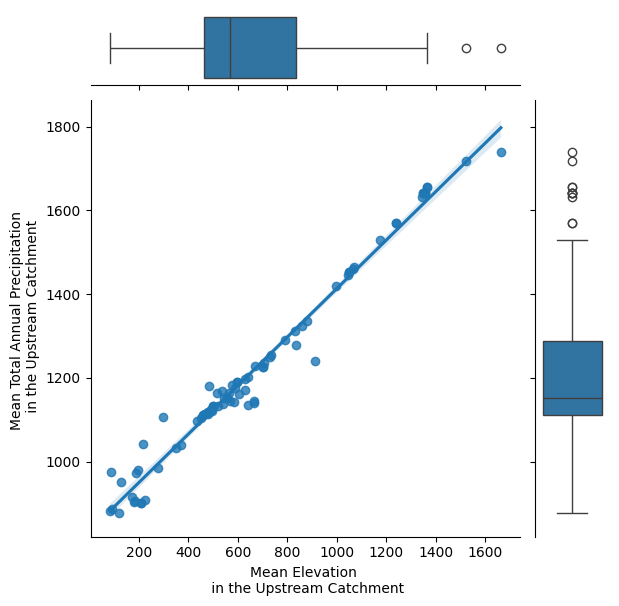

In [19]:
# Scatter plot with regression line and boxplots

g = sns.JointGrid(data=df[df['Catchment_name']=='Mondego'], x='Elevation_mean_catch', y='prec_ann_catch')
g.plot(sns.regplot, sns.boxplot)
g.ax_joint.set_xlabel('Mean Elevation \n in the Upstream Catchment') # NOTE: it's not possible to use plt.xlabel to change axis titles
g.ax_joint.set_ylabel('Mean Total Annual Precipitation \n in the Upstream Catchment')
plt.show()

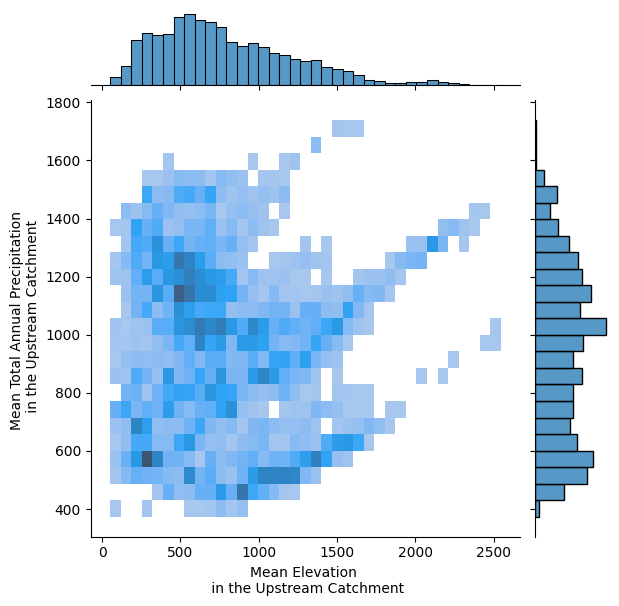

In [20]:
# Heat plot and histograms
g = sns.jointplot(data=df, x='Elevation_mean_catch', y='prec_ann_catch', kind="hist")
g.ax_joint.set_xlabel('Mean Elevation \n in the Upstream Catchment') # NOTE: it's not possible to use plt.xlabel to change axis titles
g.ax_joint.set_ylabel('Mean Total Annual Precipitation \n in the Upstream Catchment')
plt.show()

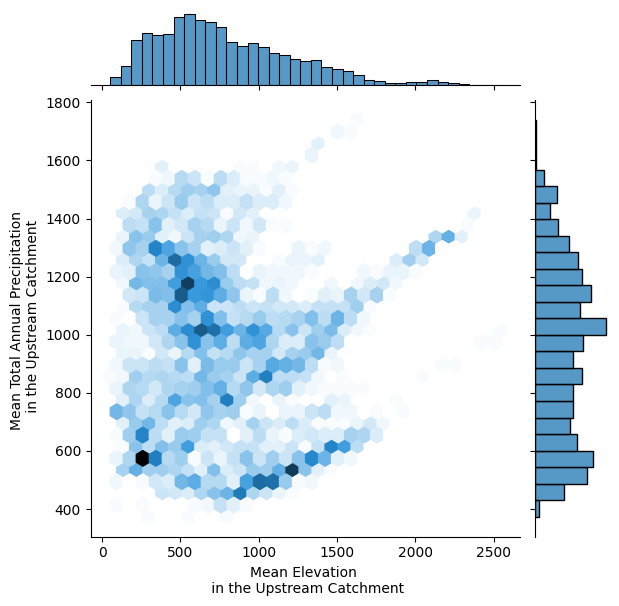

In [21]:
# Hexbin plot with histogram

g = sns.jointplot(data=df, x='Elevation_mean_catch', y='prec_ann_catch', kind="hex")
g.ax_joint.set_xlabel('Mean Elevation \n in the Upstream Catchment') # NOTE: it's not possible to use plt.xlabel to change axis titles
g.ax_joint.set_ylabel('Mean Total Annual Precipitation \n in the Upstream Catchment')
plt.show()

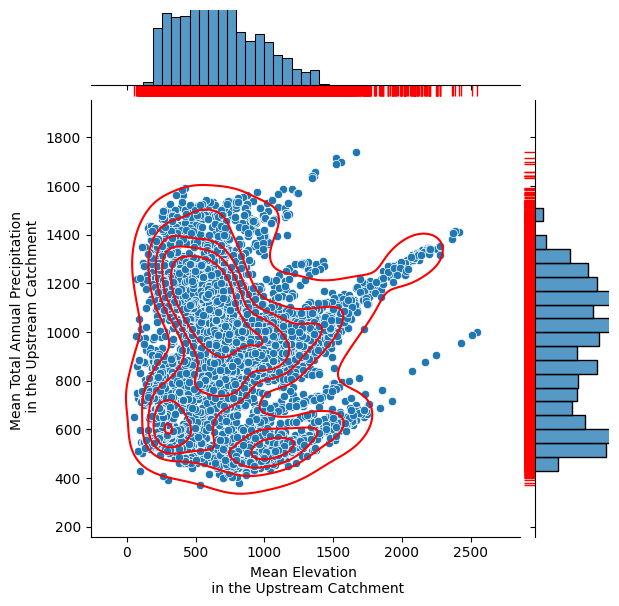

In [22]:
# KDE plots with rugplots and histograms

g = sns.jointplot(data=df, x='Elevation_mean_catch', y='prec_ann_catch')
g.plot_joint(sns.kdeplot, color="r", zorder=1, levels=6)
g.plot_marginals(sns.rugplot, color="r", height=-.15, clip_on=False)
g.ax_joint.set_xlabel('Mean Elevation \n in the Upstream Catchment') # NOTE: it's not possible to use plt.xlabel to change axis titles
g.ax_joint.set_ylabel('Mean Total Annual Precipitation \n in the Upstream Catchment')
plt.show()

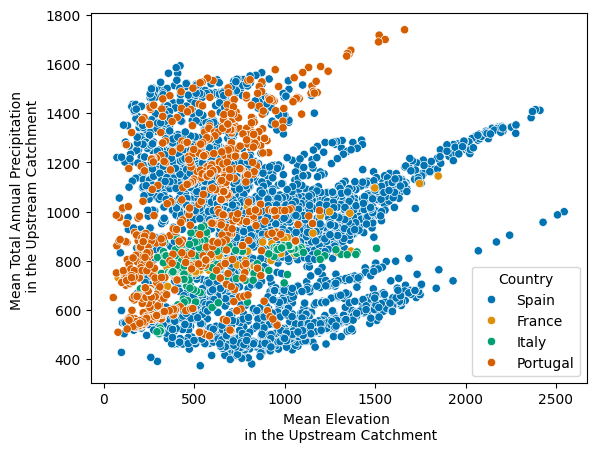

In [25]:
# Scatterplots with categorical variable

sns.scatterplot(data=df, x='Elevation_mean_catch', y='prec_ann_catch', hue='Country', palette="colorblind")
plt.xlabel( "Mean Elevation \n in the Upstream Catchment" , size = 10) 
plt.ylabel( "Mean Total Annual Precipitation \n in the Upstream Catchment" , size = 10) 
plt.show()

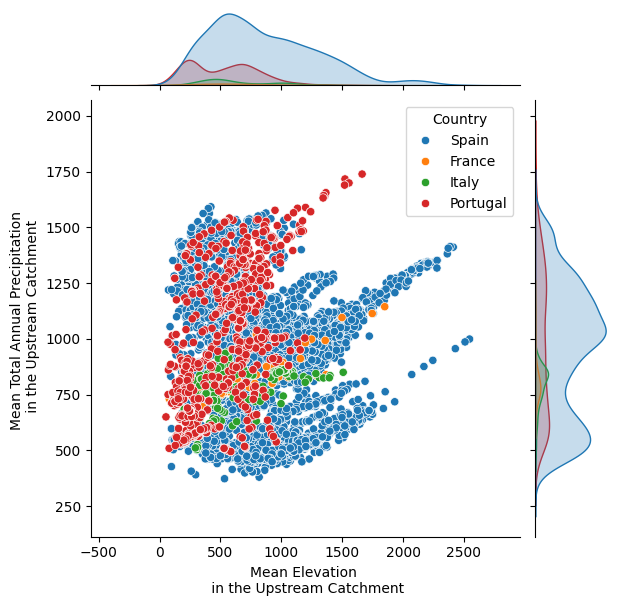

In [26]:
# Scatter plot with categorical variable and univariate KDE plot

g = sns.jointplot(data=df, x='Elevation_mean_catch', y='prec_ann_catch', hue='Country')
g.ax_joint.set_xlabel('Mean Elevation \n in the Upstream Catchment') # NOTE: it's not possible to use plt.xlabel to change axis titles
g.ax_joint.set_ylabel('Mean Total Annual Precipitation \n in the Upstream Catchment')
plt.show()

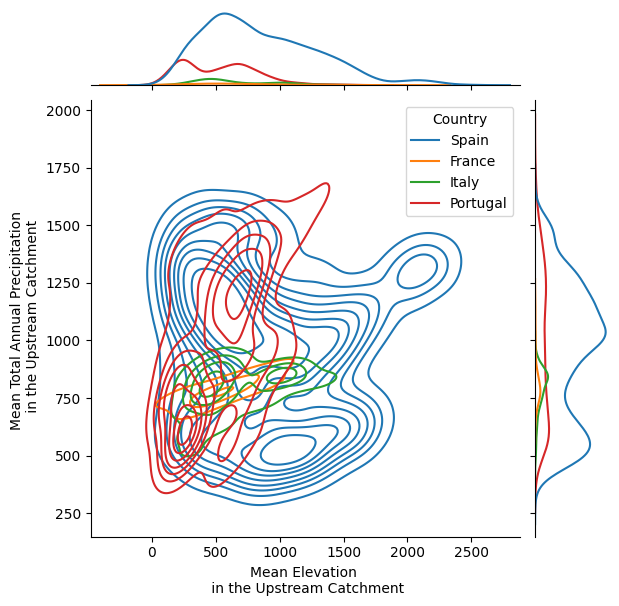

In [27]:
# Bivariate and univariate KDE plots

g = sns.jointplot(data=df, x='Elevation_mean_catch', y='prec_ann_catch', hue='Country', kind="kde")
g.ax_joint.set_xlabel('Mean Elevation \n in the Upstream Catchment') # NOTE: it's not possible to use plt.xlabel to change axis titles
g.ax_joint.set_ylabel('Mean Total Annual Precipitation \n in the Upstream Catchment')
plt.show()

## Exercise 4
Using an appropriate visualization, explore how Mean Annual Temperature (Temp_ann) may affect the
presence of Salmo trutta fario (Brown Trout).

First find the name of brown trout in the dataset. Column exists for Salmo trutta fario, which should be 1 if the fish is present at the site, and 0 if the fish is not present at the site.
Let's graph the presence of brown trout to the temperatue

In [34]:
df["Salmo trutta fario"]

0       0
1       1
2       1
3       1
4       1
       ..
5006    1
5007    1
5008    1
5009    1
5010    1
Name: Salmo trutta fario, Length: 5011, dtype: int64

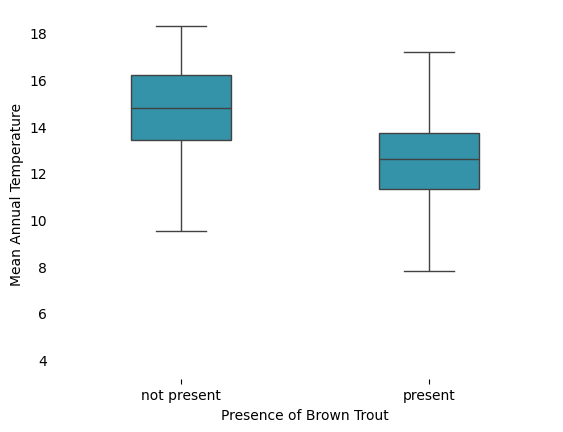

In [71]:
# need temp_data where the trout are present and where they are not
df_trout = df[(df['Salmo trutta fario']==1)| 
    (df['Salmo trutta fario']==0) 
    ]

x_labels = ['not present', 'present']

sns.boxplot(
    data= df_trout,
    x='Salmo trutta fario',
    y='temp_ann',
    width=0.4,
    fliersize=0,
    color='#219ebc', # HEX color picked from here: https://coolors.co/palettes/trending - don't forget to start by "#"
    )
plt.tick_params(left=False) # removes tickmarks
sns.despine(left=True, bottom=True)
plt.xlabel('Presence of Brown Trout')
plt.ylabel('Mean Annual Temperature')
plt.xticks(ticks=[0, 1], labels=x_labels)
plt.show()

The boxplot does a good job at showing the different medians and distributions between the sites with and without brown trout present. It would be interesting to also see the datapoints, so let's try a jitter plot

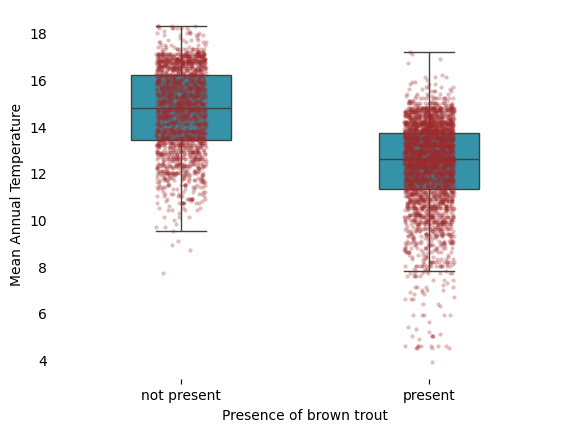

In [72]:

sns.boxplot(
    data= df_trout,
    x='Salmo trutta fario',
    y='temp_ann',
    width=0.4,
    fliersize=0,
    color='#219ebc', # HEX color picked from here: https://coolors.co/palettes/trending - don't forget to start by "#"
    )
sns.stripplot(
    data= df_trout,
    x='Salmo trutta fario',
    y='temp_ann',
    jitter=0.1, # the ammount of jitter (i.e. random point dispersion along the x-axis).
    linewidth=0, # no line around the poits
    color='#9e2a2b', # HEX color picked from here: https://coolors.co/palettes/trending - don't forget to start by "#"
    alpha=.3,
    s=3, # point size
    )
plt.tick_params(left=False) # removes tickmarks
sns.despine(left=True, bottom=True)
plt.xlabel('Presence of brown trout')
plt.ylabel('Mean Annual Temperature')
plt.xticks(ticks=[0, 1], labels=x_labels)
plt.show()

Now we know a bit more, but maybe a violin plot would be more interesting to see the distribution

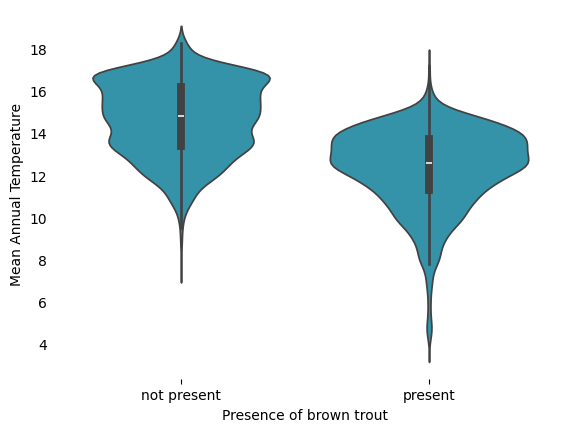

In [73]:
sns.violinplot(
    data= df_trout,
    x='Salmo trutta fario',
    y='temp_ann',
    color='#219ebc', # HEX color picked from here: https://coolors.co/palettes/trending - don't forget to start by "#"
    )
plt.tick_params(left=False) # removes tickmarks
sns.despine(left=True, bottom=True)
plt.xlabel('Presence of brown trout')
plt.ylabel('Mean Annual Temperature')
plt.xticks(ticks=[0, 1], labels=x_labels)
plt.show()

The violin plot gives a better representation of the distributions. We can see that the sites where the brown trout is not present have a lot of points around 13 degrees, whereas the sites without have a high density between 13 and 17 degrees. 

Now let's repeat this for the Minho and Tagus catchments

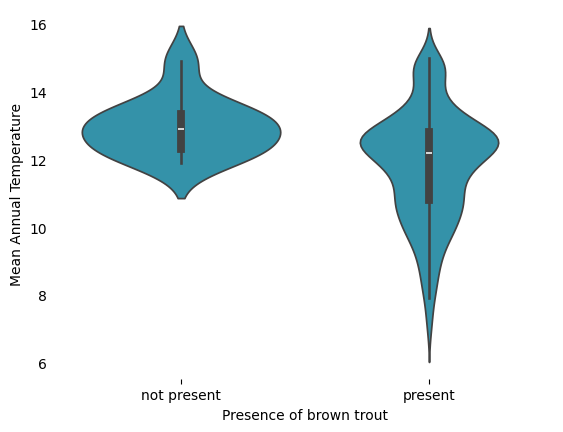

In [74]:
df_minho_trout = df_trout[(df_trout['Catchment_name']=="Minho")]

sns.violinplot(
    data= df_minho_trout,
    x='Salmo trutta fario',
    y='temp_ann',
    color='#219ebc', # HEX color picked from here: https://coolors.co/palettes/trending - don't forget to start by "#"
    )
plt.tick_params(left=False) # removes tickmarks
sns.despine(left=True, bottom=True)
plt.xlabel('Presence of brown trout')
plt.ylabel('Mean Annual Temperature')
plt.xticks(ticks=[0, 1], labels=x_labels)
plt.show()


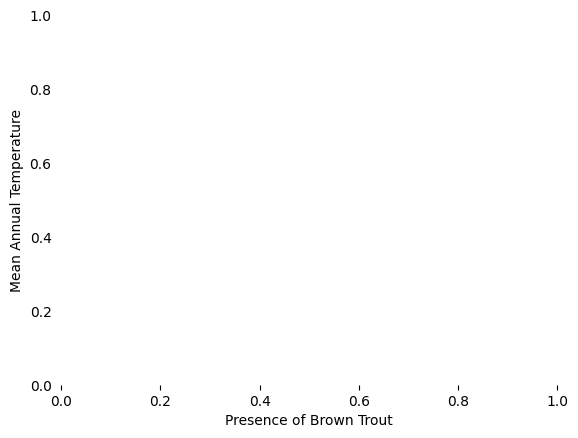

In [35]:
df_tagus_trout = df[(df['Catchment_name']=="Tagus")] 

sns.boxplot(
    data= df_tagus_trout,
    x='Salmo trutta fario',
    y='temp_ann',
    width=0.4,
    fliersize=0,
    color='#219ebc', # HEX color picked from here: https://coolors.co/palettes/trending - don't forget to start by "#"
    )
plt.tick_params(left=False) # removes tickmarks
sns.despine(left=True, bottom=True)
plt.xlabel('Presence of Brown Trout')
plt.ylabel('Mean Annual Temperature')
plt.show()

In [31]:
df_tagus_trout

,Site_code,Latitude,Longitude,Country,Catchment_name,Galiza,Subsample,Calib_EFI_Medit,Calib_connect,Calib_hydrol,...,Squalius malacitanus,Squalius pyrenaicus,Squalius torgalensis,Thymallus thymallus,Tinca tinca,Zingel asper,Squalius sp,Barbatula sp,Phoxinus sp,Iberochondrostoma_sp


I'm assuming that tagus is referring to the Tejo catchment

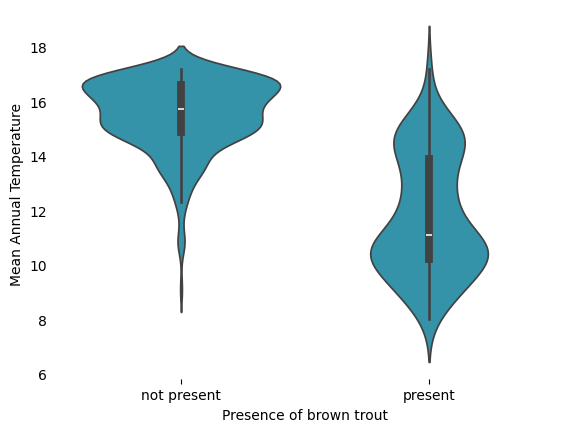

In [75]:
df_tejo_trout = df_trout[(df_trout['Catchment_name']=="Tejo")] 

sns.violinplot(
    data= df_tejo_trout,
    x='Salmo trutta fario',
    y='temp_ann',
    color='#219ebc', # HEX color picked from here: https://coolors.co/palettes/trending - don't forget to start by "#"
    )
plt.tick_params(left=False) # removes tickmarks
sns.despine(left=True, bottom=True)
plt.xlabel('Presence of brown trout')
plt.ylabel('Mean Annual Temperature')
plt.xticks(ticks=[0, 1], labels=x_labels)
plt.show()


Let's compare them side by side

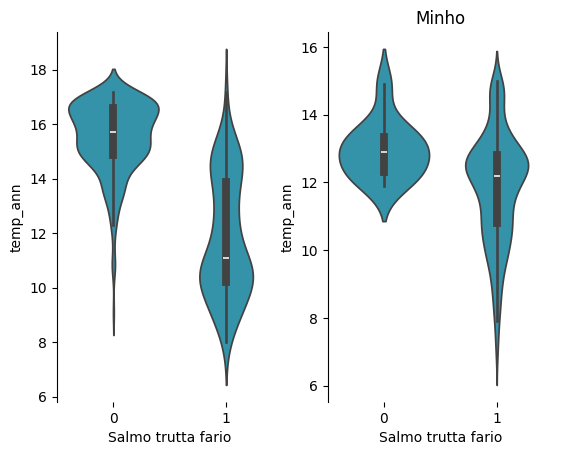

In [ ]:
fig, ax =plt.subplots(1,2)
sns.violinplot(
    data= df_tejo_trout,
    x='Salmo trutta fario',
    y='temp_ann',
    color='#219ebc',
    ax=ax[0]
    )
plt.title("Tejo")

sns.violinplot(
    data= df_minho_trout,
    x='Salmo trutta fario',
    y='temp_ann',
    color='#219ebc',
    ax=ax[1]
    )
sns.despine(bottom=True)
plt.title("Minho")

plt.show()

We can see that at the Tejo sites, the salmon sampled have a higher density present at lower temperatures than at the Minho sites. The distribution at Minho sites is more similar to the graph for all samples. 

The next exercise is to see if the actual_river_slops is drawn from a normal distribution. First let's check what the actual_river_slope vairable is

In [53]:
df["Actual_river_slope"]

0        0.001
1       13.406
2        9.398
3        8.186
4       11.736
         ...  
5006    17.700
5007     0.010
5008     3.059
5009    62.100
5010    17.800
Name: Actual_river_slope, Length: 5011, dtype: float64

Now we know that this field is a float, so let's create a graph. To see a normal distribution, we need to use a graph type that counts each 'bin', let's use a histogram

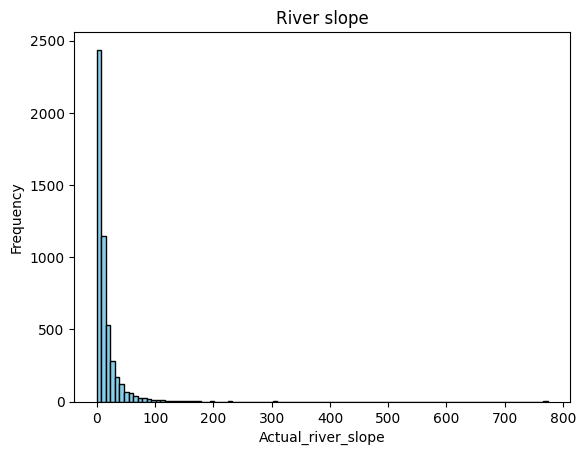

In [68]:
plt.hist(data=df, x="Actual_river_slope", bins=100, color='skyblue', edgecolor='black')
 
# Adding labels and title
plt.xlabel('Actual_river_slope')
plt.ylabel('Frequency')
plt.title('River slope')
 
# Display the plot
plt.show()

Clearly there are a few outliers that make it less useful for some applications, but to see if it's a normal distribution, it is pretty clear that it is not normally distributed. Let's check with statistics aswell.

In [ ]:
from scipy import stats

k2, p = stats.normaltest(df['Actual_river_slope'].dropna()) # .dropna() handles potential missing values
alpha = 0.05

print(f"p = {p}")

if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

p = 0.0
The null hypothesis can be rejected


At a significance level of 0.05, we can reject the null hypothesis that Actual_river_slope is normally distributed. i.e. it is not normally distributed at alpha of 0.. Interestingly, if missing values are not dropped, the null hypothesis does not get rejected. 

For the last question, let's take 100 samples of 2000 observations with replacement, compute the mean for each sample and plot the resulting histogram of means. Test if these 100 mean values are drawn from a normal distribution.

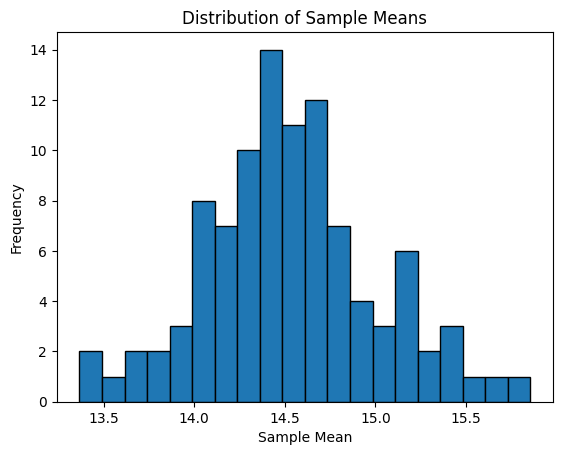

In [76]:
import numpy as np

num_samples = 100
sample_size = 2000

# Initialize an empty list to store the means
sample_means = []

# Loop through to take samples
for _ in range(num_samples):
  # Sample with replacement
  sample = df['Actual_river_slope'].sample(n=sample_size, replace=True)
  # Calculate the mean of the sample and append to sample_means
  sample_means.append(np.mean(sample))

# Plot the histogram of sample means
plt.hist(sample_means, bins=20, edgecolor='black') 
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.title('Distribution of Sample Means')
plt.show()

In [81]:
# Test for normality
k2, p = stats.normaltest(sample_means)
alpha = 0.05
print(f"p = {p}")
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

p = 0.5275012090796444
The null hypothesis cannot be rejected


The result is that the null hypothesis cannot be rejected, and therefore it appears to be normally distributed, at a significance level of 0.05. 